Original graph: 81306 nodes, 1768149 edges.
Reduced graph: 68413 nodes, 1685163 edges.
Hub Threshold: 4.579473933737e-06, Suspicious Hubs: 6842
Authority Threshold: 4.545274087216759e-06, Suspicious Authorities: 6842


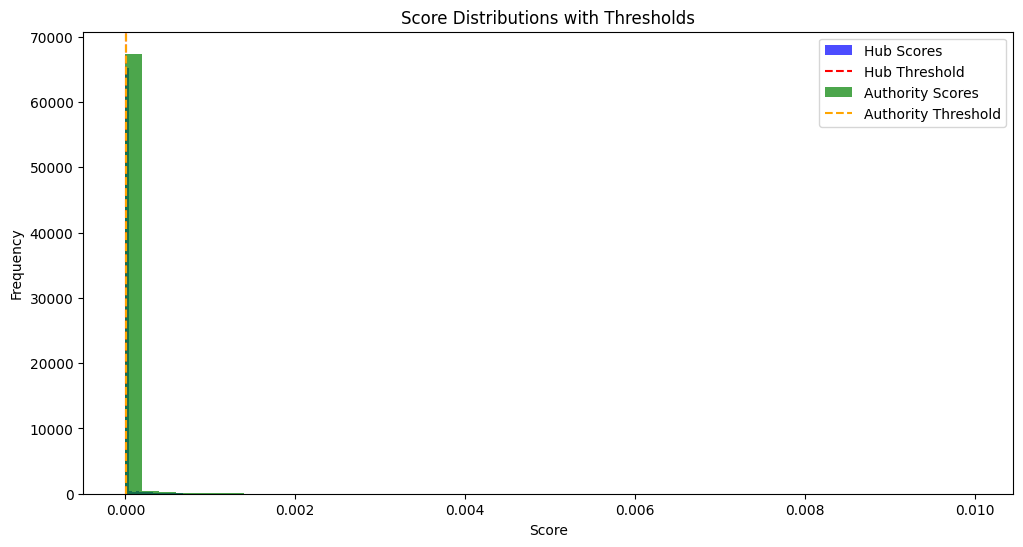

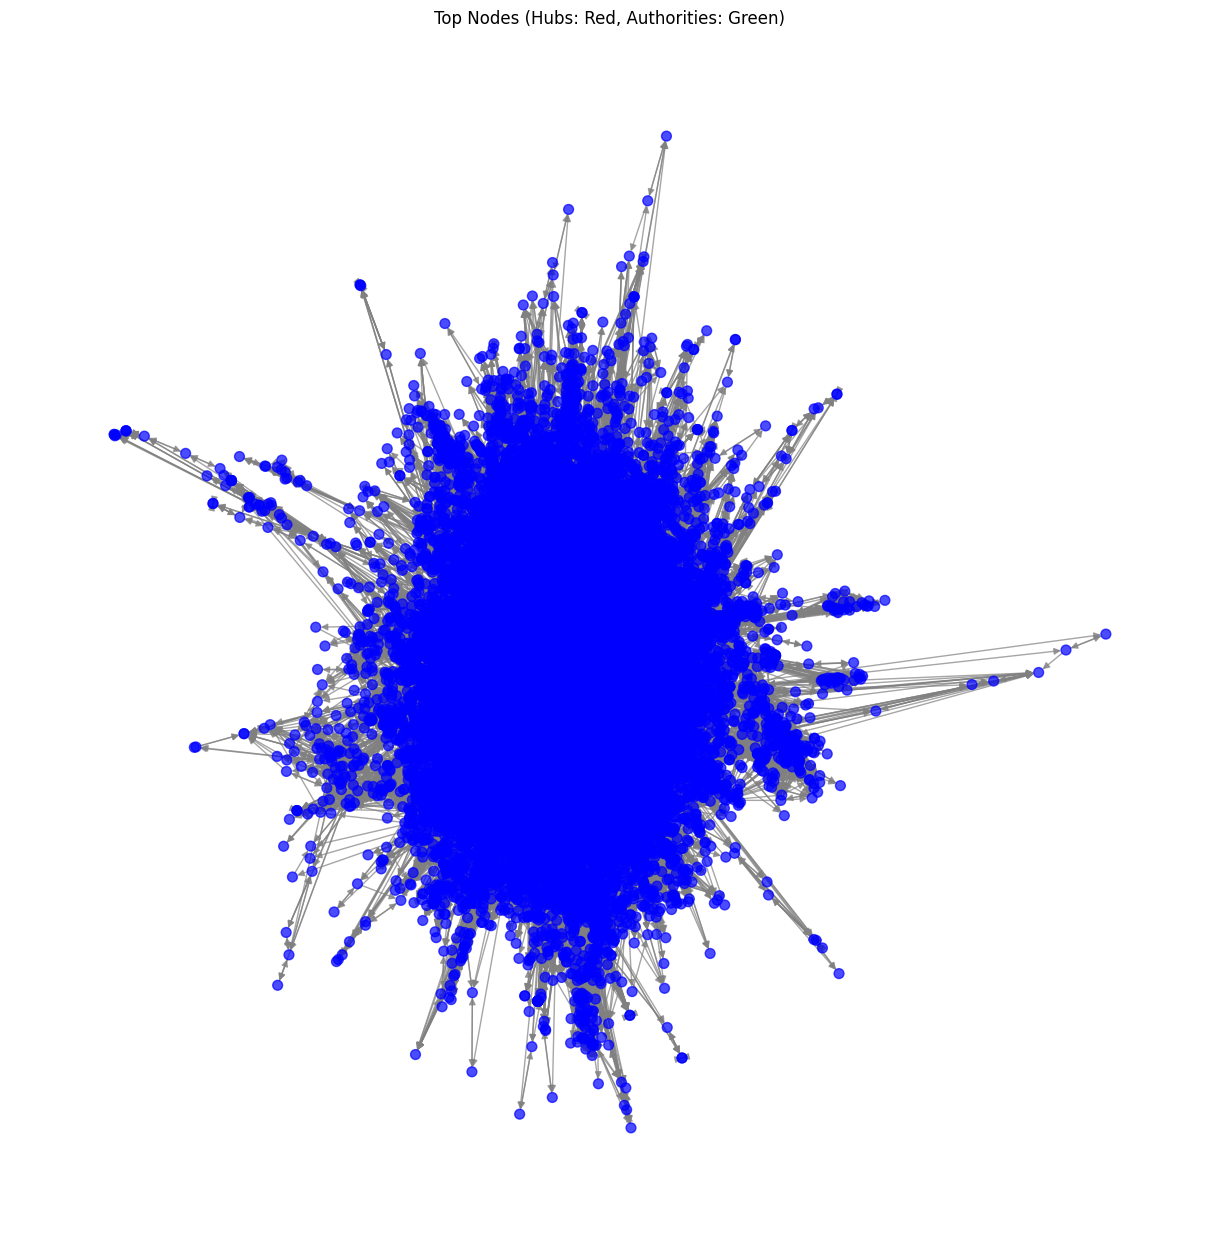

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the graph from a file
def load_graph_from_file(file_path):
    """
    Loads a directed graph from an edge list file.
    Each line in the file should contain two integers: source and target.
    """
    G = nx.DiGraph()
    with open(file_path, "r") as file:
        for line in file:
            source, target = line.strip().split()
            G.add_edge(source, target)
    return G

# Step 2: Apply HITS algorithm
def apply_hits_algorithm(G, max_iter=100, tol=1e-08, top_n=10):
    """
    Runs the HITS algorithm to compute hub and authority scores.
    """
    hubs, authorities = nx.hits(G, max_iter=max_iter, tol=tol, normalized=True)
    top_hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return hubs, authorities, top_hubs, top_authorities

# Step 3: Detect suspicious users
def detect_suspicious_users(hubs, authorities, hub_percentile=90, authority_percentile=90):
    """
    Detects suspicious nodes with hub and authority scores above specified percentiles.
    """
    hub_scores = np.array(list(hubs.values()))
    authority_scores = np.array(list(authorities.values()))
    hub_threshold = np.percentile(hub_scores, hub_percentile)
    authority_threshold = np.percentile(authority_scores, authority_percentile)
    suspicious_hubs = {node: score for node, score in hubs.items() if score >= hub_threshold}
    suspicious_authorities = {node: score for node, score in authorities.items() if score >= authority_threshold}
    return hub_threshold, authority_threshold, suspicious_hubs, suspicious_authorities

# Step 4: Visualize score distributions with thresholds
def visualize_distributions_with_thresholds(hubs, authorities, hub_threshold, authority_threshold):
    """
    Plots histograms of hub and authority scores with threshold lines.
    """
    plt.figure(figsize=(12, 6))
    plt.hist(hubs.values(), bins=50, alpha=0.7, label="Hub Scores", color="blue")
    plt.axvline(hub_threshold, color="red", linestyle="--", label="Hub Threshold")
    plt.hist(authorities.values(), bins=50, alpha=0.7, label="Authority Scores", color="green")
    plt.axvline(authority_threshold, color="orange", linestyle="--", label="Authority Threshold")
    plt.title("Score Distributions with Thresholds")
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Step 5: Visualize top hub and authority nodes
def visualize_top_nodes(G, top_hubs, top_authorities):
    """
    Visualizes the graph with top hub and authority nodes highlighted.
    """
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42)  # Fixed layout for consistent visualization

    # Extract top hub and authority nodes
    top_hub_nodes = {node for node, _ in top_hubs}
    top_authority_nodes = {node for node, _ in top_authorities}
    node_colors = [
        "red" if node in top_hub_nodes else "green" if node in top_authority_nodes else "blue"
        for node in G.nodes()
    ]

    nx.draw(G, pos, node_color=node_colors, node_size=50, edge_color="gray", with_labels=False, alpha=0.7)
    plt.title("Top Nodes (Hubs: Red, Authorities: Green)")
    plt.show()

# Step 6: Visualize suspicious nodes
def visualize_suspicious_nodes(G, suspicious_hubs, suspicious_authorities):
    """
    Visualizes the graph with suspicious hub and authority nodes highlighted.
    """
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42)  # Fixed layout for consistent visualization

    # Extract suspicious hub and authority nodes
    suspicious_hub_nodes = set(suspicious_hubs.keys())
    suspicious_authority_nodes = set(suspicious_authorities.keys())
    node_colors = [
        "purple" if node in suspicious_hub_nodes else "yellow" if node in suspicious_authority_nodes else "gray"
        for node in G.nodes()
    ]

    nx.draw(G, pos, node_color=node_colors, node_size=50, edge_color="gray", with_labels=False, alpha=0.7)
    plt.title("Suspicious Nodes (Hubs: Purple, Authorities: Yellow)")
    plt.show()

# Main Execution
if __name__ == "__main__":
    # Replace with the path to your dataset
    file_path = "twitter_combined.txt"
    
    # Load the graph
    G = load_graph_from_file(file_path)

    # Analyze the largest strongly connected component if necessary
    print(f"Original graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges.")
    if not nx.is_strongly_connected(G):
        largest_scc = max(nx.strongly_connected_components(G), key=len)
        G = G.subgraph(largest_scc).copy()
        print(f"Reduced graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges.")

    # Ensure there are edges in the graph
    if G.number_of_edges() == 0:
        print("The graph has no edges after reduction. HITS cannot be applied.")
    else:
        # Apply HITS algorithm
        hubs, authorities, top_hubs, top_authorities = apply_hits_algorithm(G)

        # Detect suspicious users with adjusted thresholds
        hub_percentile = 90  # Use the 90th percentile for hubs
        authority_percentile = 90  # Use the 90th percentile for authorities
        hub_threshold, authority_threshold, suspicious_hubs, suspicious_authorities = detect_suspicious_users(
            hubs, authorities, hub_percentile, authority_percentile
        )

        # Display thresholds and suspicious nodes
        print(f"Hub Threshold: {hub_threshold}, Suspicious Hubs: {len(suspicious_hubs)}")
        print(f"Authority Threshold: {authority_threshold}, Suspicious Authorities: {len(suspicious_authorities)}")

        # Visualize score distributions with thresholds
        visualize_distributions_with_thresholds(hubs, authorities, hub_threshold, authority_threshold)

        # Visualize top hub and authority nodes
        visualize_top_nodes(G, top_hubs, top_authorities)

        # Visualize suspicious nodes
        #visualize_suspicious_nodes(G, suspicious_hubs, suspicious_authorities)


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def load_graph_from_file(file_path):
    """
    Loads a directed graph from an edge list file.
    Each line in the file should contain two integers: source and target.
    """
    G = nx.DiGraph()
    with open(file_path, "r") as file:
        for line in file:
            source, target = line.strip().split()
            G.add_edge(source, target)
    return G

# Example:
file_path = "twitter_combined.txt"

# Load the graph
G = load_graph_from_file(file_path)


# Step 2: Apply HITS algorithm
def apply_hits_algorithm(G, max_iter=100, tol=1e-08, top_n=10):
    """
    Runs the HITS algorithm and identifies the top hub and authority nodes.
    """
    hubs, authorities = nx.hits(G, max_iter=max_iter, tol=tol, normalized=True)
    top_hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return hubs, authorities, top_hubs, top_authorities

# Step 3: Detect suspicious users
def detect_suspicious_users(hubs, authorities, hub_percentile=95, authority_percentile=95):
    """
    Detects suspicious nodes with hub and authority scores above specified percentiles.
    """
    hub_scores = np.array(list(hubs.values()))
    authority_scores = np.array(list(authorities.values()))
    hub_threshold = np.percentile(hub_scores, hub_percentile)
    authority_threshold = np.percentile(authority_scores, authority_percentile)
    suspicious_hubs = {node: score for node, score in hubs.items() if score >= hub_threshold}
    suspicious_authorities = {node: score for node, score in authorities.items() if score >= authority_threshold}
    return hub_threshold, authority_threshold, suspicious_hubs, suspicious_authorities

# Step 6: Visualize suspicious nodes
def visualize_suspicious_nodes(G, suspicious_hubs, suspicious_authorities):
    """
    Visualizes the graph with suspicious hub and authority nodes highlighted.
    """
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42)  # Fixed layout for consistent visualization

    # Extract suspicious hub and authority nodes
    suspicious_hub_nodes = set(suspicious_hubs.keys())
    suspicious_authority_nodes = set(suspicious_authorities.keys())
    node_colors = [
        "purple" if node in suspicious_hub_nodes else "yellow" if node in suspicious_authority_nodes else "gray"
        for node in G.nodes()
    ]

    nx.draw(G, pos, node_color=node_colors, node_size=50, edge_color="gray", with_labels=False, alpha=0.7)
    plt.title("Suspicious Nodes (Hubs: Purple, Authorities: Yellow)")
    plt.show()


# Step 5: Visualize overlap
def visualize_overlap(top_hubs, top_authorities, suspicious_hubs, suspicious_authorities):
    """
    Identifies and visualizes overlaps between top nodes and suspicious nodes.
    """
    top_hub_nodes = {node for node, _ in top_hubs}
    top_authority_nodes = {node for node, _ in top_authorities}
    suspicious_hub_nodes = set(suspicious_hubs.keys())
    suspicious_authority_nodes = set(suspicious_authorities.keys())

    overlap_hubs = top_hub_nodes.intersection(suspicious_hub_nodes)
    overlap_authorities = top_authority_nodes.intersection(suspicious_authority_nodes)

    print(f"\nCommon nodes in Top Hub Nodes and Suspicious Hub Nodes: {overlap_hubs}")
    print(f"Common nodes in Top Authority Nodes and Suspicious Authority Nodes: {overlap_authorities}")

# Main Execution
if __name__ == "__main__":


    # Analyze the graph properties
    if not nx.is_strongly_connected(G):
        largest_wcc = max(nx.weakly_connected_components(G), key=len)
        G = G.subgraph(largest_wcc).copy()


    # Handle cases with no edges after reduction
    if G.number_of_edges() == 0:
        print("The graph has no edges after reduction. HITS cannot be applied.")
    else:
        # Apply HITS algorithm
        hubs, authorities, top_hubs, top_authorities = apply_hits_algorithm(G)

        # Display top nodes
        print("\nTop Hub Nodes:")
        for node, score in top_hubs:
            print(f"Node: {node}, Hub Score: {score:.6f}")
        
        print("\nTop Authority Nodes:")
        for node, score in top_authorities:
            print(f"Node: {node}, Authority Score: {score:.6f}")


        # Detect suspicious users
        hub_percentile = 90  # Top 10% as suspicious hubs
        authority_percentile = 90  # Top 10% as suspicious authorities
        hub_threshold, authority_threshold, suspicious_hubs, suspicious_authorities = detect_suspicious_users(hubs, authorities, hub_percentile, authority_percentile)



                # Display suspicious nodes
        print("\nSuspicious Hub Nodes (Potential Malicious Users):")
        for node, score in suspicious_hubs.items():
            print(f"Node: {node}, Hub Score: {score:.6f}")
        
        print("\nSuspicious Authority Nodes (Potential Malicious Users):")
        for node, score in suspicious_authorities.items():
            print(f"Node: {node}, Authority Score: {score:.6f}")

        # Visualize overlap
        visualize_overlap(top_hubs, top_authorities, suspicious_hubs, suspicious_authorities)





Top Hub Nodes:
Node: 208132323, Hub Score: 0.002000
Node: 440963134, Hub Score: 0.001738
Node: 153226312, Hub Score: 0.001567
Node: 197504076, Hub Score: 0.001498
Node: 100581193, Hub Score: 0.001454
Node: 279787626, Hub Score: 0.001442
Node: 221829166, Hub Score: 0.001427
Node: 184097849, Hub Score: 0.001391
Node: 274153775, Hub Score: 0.001391
Node: 463952369, Hub Score: 0.001366

Top Authority Nodes:
Node: 40981798, Authority Score: 0.009715
Node: 43003845, Authority Score: 0.009363
Node: 22462180, Authority Score: 0.009183
Node: 34428380, Authority Score: 0.009161
Node: 31331740, Authority Score: 0.005457
Node: 27633075, Authority Score: 0.005448
Node: 18996905, Authority Score: 0.004948
Node: 83943787, Authority Score: 0.004809
Node: 117674417, Authority Score: 0.004786
Node: 238260874, Authority Score: 0.004449

Suspicious Hub Nodes (Potential Malicious Users):
Node: 214328887, Hub Score: 0.001111
Node: 34428380, Hub Score: 0.000256
Node: 17116707, Hub Score: 0.000600
Node: 2846

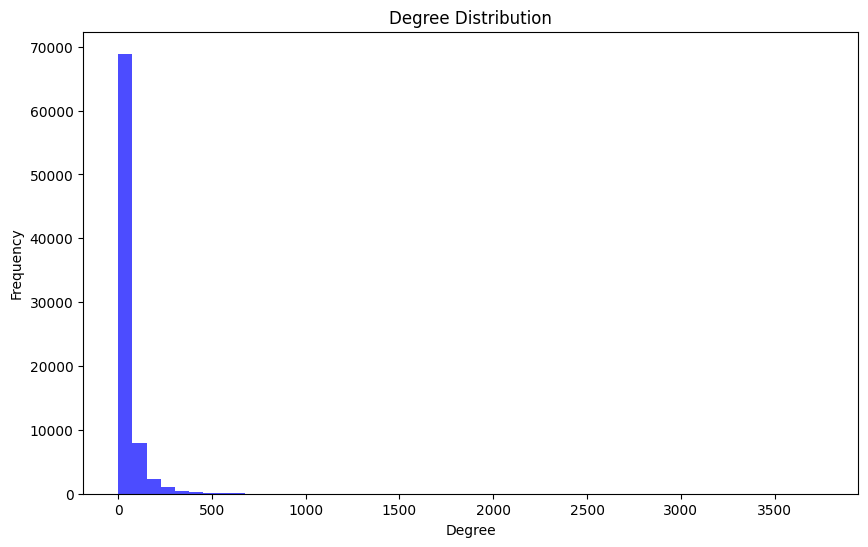

In [5]:
def plot_degree_distribution(G):
    degrees = [degree for _, degree in G.degree()]
    plt.figure(figsize=(10, 6))
    plt.hist(degrees, bins=50, color="blue", alpha=0.7)
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

plot_degree_distribution(G)

In [6]:
import networkx.algorithms.community as nx_comm

def detect_communities(G):
    communities = nx_comm.greedy_modularity_communities(G)
    print(f"Detected {len(communities)} communities.")
    return communities

# Example:
communities = detect_communities(G)


Detected 240 communities.
